In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
import time

census_original = pd.read_csv("data/census-income.csv")
census = census_original.copy()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.01, random_state=42)
for big_set_index, small_set_index in split.split(census, census["income"]):
    big_set = census.loc[big_set_index]
    small_set = census.loc[small_set_index]
    
small_set.head()

,age,class of worker,industry code,occupation code,education,wage per hour,enroll in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,income
30828,51,Private,9,36,High school graduate,0,NaN,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,94,0
34015,25,Private,19,42,5th or 6th grade,0,NaN,Never married,Manufacturing-nondurable goods,Handlers equip cleaners etc,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,NaN,2,32,94,0
23303,41,Self-employed-not incorporated,45,11,Doctorate degree(PhD EdD),0,NaN,Never married,Other professional services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,94,0
21506,34,Private,35,16,Masters degree(MA MS MEng MEd MSW MBA),0,NaN,Never married,Finance insurance and real estate,Sales,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,95,1
9208,23,Private,40,29,High school graduate,350,NaN,Never married,Entertainment,Other service,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,95,0


In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37382 entries, 0 to 37381
Data columns (total 42 columns):
age                                          37382 non-null int64
class of worker                              28594 non-null object
industry code                                37382 non-null int64
occupation code                              37382 non-null int64
education                                    37382 non-null object
wage per hour                                37382 non-null int64
enroll in edu inst last wk                   2097 non-null object
marital status                               37382 non-null object
major industry code                          37382 non-null object
major occupation code                        28563 non-null object
race                                         37382 non-null object
hispanic origin                              37262 non-null object
sex                                          37382 non-null object
member of a labor union  

# Class of Worker

In [5]:
census['class of worker'].value_counts()

Private                           21176
Local government                   2104
Self-employed-not incorporated     1659
Self-employed-incorporated         1310
State government                   1183
Federal government                 1118
Never worked                         31
Without pay                          13
Name: class of worker, dtype: int64

In [71]:
worker_class = []
temp_small_set = small_set.copy()
for item in temp_small_set['class of worker'].tolist():
    class_ = str(item).lower()
    if class_ == "private":
        worker_class.append("Private")
    elif class_ == "local government" or class_ == "state government" or class_ == "federal government":
        worker_class.append("Government")
    elif class_ == "self-employed-not incorporated" or class_ == "self-employed-incorporated":
        worker_class.append("Self-employed")
    elif class_ == "never worked" or class_ == "without pay":
        worker_class.append("Other")
    else:
        worker_class.append(np.nan)
        
temp_small_set['class of worker'] = worker_class
temp_small_set['class of worker'] = temp_small_set['class of worker'].fillna("Not In Universe")
print(temp_small_set['class of worker'].value_counts())

Private            210
Not In Universe     93
Government          40
Self-employed       30
Other                1
Name: class of worker, dtype: int64


# Education

In [24]:
census['education'].value_counts()

High school graduate                      9589
Some college but no degree                6264
Bachelors degree(BA AB BS)                6068
Children                                  3740
Masters degree(MA MS MEng MEd MSW MBA)    2566
Associates degree-occup /vocational       1284
10th grade                                1120
Associates degree-academic program        1081
11th grade                                1076
Prof school degree (MD DDS DVM LLB JD)    1056
7th and 8th grade                          998
9th grade                                  821
Doctorate degree(PhD EdD)                  717
5th or 6th grade                           375
12th grade no diploma                      321
1st 2nd 3rd or 4th grade                   225
Less than 1st grade                         81
Name: education, dtype: int64

In [36]:
education_class = []
temp_small_set = small_set.copy()
for item in temp_small_set['education'].tolist():
    class_ = str(item).lower()
    if class_ == "high school graduate":
        education_class.append("High School Graduate")
    elif class_ == "some college but no degree" or class_ == "associates degree-occup /vocational" or class_ == "associates degree-academic program":
        education_class.append("College/ Associates Degree")
    elif class_ == "bachelors degree(ba ab bs)":
        education_class.append("Bachelors Degree")
    elif class_ == "masters degree(ma ms meng med msw mba)" or class_ == "prof school degree (md dds dvm llb jd)" or class_ == "doctorate degree(phd edd)":
        education_class.append("Post-graduates Degree")
    elif class_ == "children":
        education_class.append("Children")
    else:
        education_class.append("Other")
print(pd.Series(education_class).value_counts())
temp_small_set['education'] = education_class

temp_small_set['education'] = temp_small_set.groupby('income')['education'].transform(lambda x: x.fillna(x.mode()[0]))
print(temp_small_set['education'].value_counts())

High School Graduate          92
College/ Associates Degree    76
Bachelors Degree              63
Other                         58
Post-graduates Degree         50
Children                      35
dtype: int64
High School Graduate          92
College/ Associates Degree    76
Bachelors Degree              63
Other                         58
Post-graduates Degree         50
Children                      35
Name: education, dtype: int64


# Enroll in edu inst last wk

In [37]:
census['enroll in edu inst last wk'].value_counts()

High school              1050
College or university    1047
Name: enroll in edu inst last wk, dtype: int64

In [72]:
temp_small_set = small_set.copy()
temp_small_set['enroll in edu inst last wk'] = temp_small_set['enroll in edu inst last wk'].fillna("Not In Universe")
temp_small_set['enroll in edu inst last wk'].value_counts()

Not In Universe          355
High school               11
College or university      8
Name: enroll in edu inst last wk, dtype: int64

# Marital status

In [39]:
census['marital status'].value_counts()

Married-civilian spouse present    20839
Never married                      11095
Divorced                            2968
Widowed                             1379
Separated                            688
Married-spouse absent                297
Married-A F spouse present           116
Name: marital status, dtype: int64

In [44]:
marital_status = []
temp_small_set = small_set.copy()
for item in temp_small_set['marital status'].tolist():
    class_ = str(item).lower()
    if class_ == "married-civilian spouse present" or class_ == "married -a f spouse present" or class_ == "married-spouse absent":
        marital_status.append("Married - together")
    elif class_ == "never married":
        marital_status.append("Never married")
    else:
        marital_status.append("Married - not together")
print(pd.Series(marital_status).value_counts())
temp_small_set['marital status'] = marital_status

temp_small_set['marital status'] = temp_small_set.groupby('income')['marital status'].transform(lambda x: x.fillna(x.mode()[0]))
print(temp_small_set['marital status'].value_counts())

Married - together        215
Never married             103
Married - not together     56
dtype: int64
Married - together        215
Never married             103
Married - not together     56
Name: marital status, dtype: int64


# major industry code

In [116]:
census['major industry code'].value_counts()

N/A or children                        8819
Retail trade                           4303
Manufacturing-durable goods            3153
Manufacturing-nondurable goods         2186
Education                              2110
Finance insurance and real estate      1952
Public administration                  1590
Other professional services            1566
Business and repair services           1550
Medical except hospital                1522
Construction                           1499
Hospital services                      1318
Transportation                         1218
Wholesale trade                        1075
Personal services except private HH     619
Agriculture                             543
Social services                         539
Communications                          446
Entertainment                           444
Utilities and sanitary services         443
Mining                                  239
Private household services              185
Forestry and fisheries          

In [49]:
# Using this, we can drop industry code

# major occupation code

In [50]:
census['major occupation code'].value_counts()

Professional specialty                   5085
Executive admin and managerial           4807
Adm support including clerical           3547
Sales                                    3416
Precision production craft & repair      2915
Other service                            2775
Machine operators assmblrs & inspctrs    1769
Transportation and material moving       1016
Handlers equip cleaners etc              1016
Technicians and related support           952
Farming forestry and fishing              554
Protective services                       542
Private household services                159
Armed Forces                               10
Name: major occupation code, dtype: int64

In [54]:
census['occupation code'].value_counts()

0     8819
2     3557
26    1914
19    1319
29    1285
36    1166
3     1041
16    1031
33    1013
34     970
35     932
12     896
10     795
4      772
8      761
23     715
38     707
17     637
37     603
31     594
28     542
7      523
42     486
30     469
11     440
32     427
24     409
18     402
5      401
41     398
13     360
39     309
14     308
44     302
9      297
15     284
25     227
43     211
1      209
6      200
21     164
27     159
40     132
22     118
45      41
20      27
46      10
Name: occupation code, dtype: int64

In [55]:
# with around 8819 being 0 "not in universe", and exactly 8819 missing from major occupation code, we can 
# confidently assume that the nan values represent not in universe, and can add that column

In [58]:
temp_small_set = small_set.copy()
temp_small_set['major occupation code'] = temp_small_set['major occupation code'].transform(lambda x: x.fillna("Not In Universe"))
print(temp_small_set['major occupation code'].value_counts())

Not In Universe                          94
Executive admin and managerial           53
Professional specialty                   48
Adm support including clerical           43
Sales                                    35
Precision production craft & repair      25
Other service                            22
Machine operators assmblrs & inspctrs    16
Handlers equip cleaners etc              12
Transportation and material moving        9
Technicians and related support           6
Farming forestry and fishing              6
Protective services                       5
Name: major occupation code, dtype: int64


In [59]:
# and drop occupation code

# Race, hispanic origin and sex

In [60]:
census['race'].value_counts()

White                          32193
Black                           3248
Asian or Pacific Islander       1098
Other                            487
Amer Indian Aleut or Eskimo      356
Name: race, dtype: int64

In [61]:
census['hispanic origin'].value_counts()

All other                    33743
Mexican-American              1074
Mexican (Mexicano)             952
Central or South American      509
Puerto Rican                   389
Other Spanish                  336
Cuban                          179
Do not know                     42
Chicano                         38
Name: hispanic origin, dtype: int64

In [62]:
census['sex'].value_counts()

Male      21152
Female    16230
Name: sex, dtype: int64

In [63]:
# will leave these in despite ethics - will see if they have useful predictive power before deciding what to do

# Member of a labor union

In [64]:
census['member of a labor union'].value_counts()

No     11250
Yes     2249
Name: member of a labor union, dtype: int64

In [67]:
temp_small_set = small_set.copy()
temp_small_set['member of a labor union'] = temp_small_set['member of a labor union'].fillna("Not In Universe")
temp_small_set['member of a labor union'].value_counts()

Not In Universe    245
No                 109
Yes                 20
Name: member of a labor union, dtype: int64

# Reason for Unemployment

In [68]:
census['reason for unemployment'].value_counts()

Other job loser          253
Re-entrant               170
Job loser - on layoff     95
Job leaver                81
New entrant               31
Name: reason for unemployment, dtype: int64

In [73]:
temp_small_set = small_set.copy()
temp_small_set['reason for unemployment'] = temp_small_set['reason for unemployment'].fillna("Not In Universe")
temp_small_set['reason for unemployment'].value_counts()

Not In Universe    367
Re-entrant           4
Other job loser      2
New entrant          1
Name: reason for unemployment, dtype: int64

# full or part time employment stat

In [74]:
census['full or part time employment stat'].value_counts()

Children or Armed Forces              20234
Full-time schedules                   12606
Not in labor force                     2595
PT for non-econ reasons usually FT     1032
PT for econ reasons usually PT          355
Unemployed full-time                    293
PT for econ reasons usually FT          158
Unemployed part- time                   109
Name: full or part time employment stat, dtype: int64

In [77]:
employment_status = []
temp_small_set = small_set.copy()
for item in temp_small_set['full or part time employment stat'].tolist():
    class_ = str(item).lower()
    if class_ == "children or armed forces":
        employment_status.append("Children or Armed Forces")
    elif class_ == "full-time schedules":
        employment_status.append("Full-time schedules")
    elif class_ == "not in labor force":
        employment_status.append("Not in labor force")
    else:
        employment_status.append("Part-time/ Unemployed")
print(pd.Series(employment_status).value_counts())
temp_small_set['full or part time employment stat'] = employment_status

Children or Armed Forces    205
Full-time schedules         121
Not in labor force           29
Part-time/ Unemployed        19
dtype: int64


# capital gains, capital losses and dividends from stocks

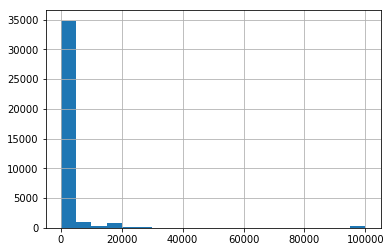

In [78]:
census['capital gains'].hist(bins=20)

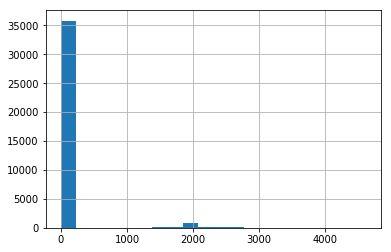

In [79]:
census['capital losses'].hist(bins=20)

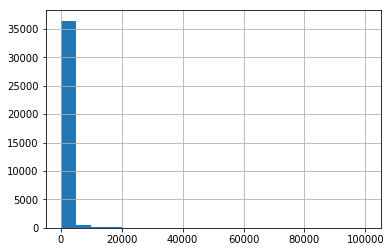

In [80]:
census['dividends from stocks'].hist(bins=20)

# tax filer status

In [81]:
census['tax filer status'].value_counts()

Joint both under 65             18614
Single                           8706
Nonfiler                         6339
Head of household                1825
Joint both 65+                   1189
Joint one under 65 & one 65+      709
Name: tax filer status, dtype: int64

In [82]:
tax_filer_status = []
temp_small_set = small_set.copy()
for item in temp_small_set['tax filer status'].tolist():
    class_ = str(item).lower()
    if class_ == "joint both under 65":
        tax_filer_status.append("Joint - under 65")
    elif class_ == "single":
        tax_filer_status.append("Single")
    elif class_ == "nonfiler":
        tax_filer_status.append("Nonfiler")
    elif class_ == "head of household":
        tax_filer_status.append("Head of household")
    else:
        tax_filer_status.append("Joint - over 65")
print(pd.Series(tax_filer_status).value_counts())
temp_small_set['tax filer status'] = tax_filer_status

Joint - under 65     183
Single                90
Nonfiler              68
Joint - over 65       18
Head of household     15
dtype: int64


# region of previous residence and state of previous residence

In [83]:
census['region of previous residence'].value_counts()

South        806
West         657
Midwest      633
Northeast    503
Abroad        73
Name: region of previous residence, dtype: int64

In [84]:
census['state of previous residence'].value_counts()

California              254
Utah                    178
North Carolina          141
?                       134
Florida                 133
Oklahoma                119
New Mexico               99
Abroad                   97
Minnesota                94
North Dakota             91
Indiana                  81
Michigan                 74
Alaska                   60
Kentucky                 56
Wyoming                  51
New Hampshire            48
Oregon                   45
West Virginia            41
Pennsylvania             40
Colorado                 40
Montana                  40
Nevada                   39
New York                 36
Maine                    34
Arkansas                 33
Ohio                     32
Iowa                     31
Arizona                  31
Vermont                  31
Illinois                 31
Texas                    31
Tennessee                31
Mississippi              30
Georgia                  30
Kansas                   29
Alabama             

# detailed household and family stat, and detailed household summary in household

In [85]:
census['detailed household and family stat'].value_counts()

Householder                                        14774
Spouse of householder                               8204
Nonfamily householder                               4728
Child <18 never marr not in subfamily               4369
Child 18+ never marr Not in a subfamily             2249
Secondary individual                                1205
Other Rel 18+ never marr not in subfamily            266
Other Rel 18+ ever marr not in subfamily             234
Child 18+ ever marr Not in a subfamily               195
Grandchild <18 never marr child of subfamily RP      144
Child 18+ ever marr RP of subfamily                  129
Other Rel 18+ spouse of subfamily RP                 126
Other Rel 18+ ever marr RP of subfamily              113
RP of unrelated subfamily                            105
Child 18+ never marr RP of subfamily                  98
Grandchild <18 never marr not in subfamily            81
Grandchild 18+ never marr not in subfamily            67
Other Rel <18 never marr child 

In [90]:
household_family_status = []
temp_small_set = small_set.copy()
for item in temp_small_set['detailed household and family stat'].tolist():
    class_ = str(item).lower()
    if class_ == "householder":
        household_family_status.append("Householder")
    elif class_ == "spouse of householder":
        household_family_status.append("Spouse of Householder")
    elif class_ == "nonfamily householder":
        household_family_status.append("Nonfamily Householder")
    elif class_[0:9] == "child <18":
        household_family_status.append("Child <18")
    elif class_[0:9] == "child 18+":
        household_family_status.append("Child 18+")
    elif class_ == "secondary individual":
        household_family_status.append("Other")
    elif class_ == "child under 18 of rp of unrel subfamily":
        household_family_status.append("Child <18")
    elif class_[0:14] == "grandchild <18":
        household_family_status.append("Child <18")
    elif class_[0:14] == "grandchild 18+":
        household_family_status.append("Child 18+")
    elif class_[0:13] == "other rel <18":
        household_family_status.append("Child <18")
    else:
        household_family_status.append("Other")
print(pd.Series(household_family_status).value_counts())
temp_small_set['detailed household and family stat'] = household_family_status

Householder              147
Spouse of Householder     84
Nonfamily Householder     51
Child <18                 43
Child 18+                 27
Other                     22
dtype: int64


In [91]:
census[['detailed household and family stat','detailed household summary in household']].head(10)

,detailed household and family stat,detailed household summary in household
0,Spouse of householder,Spouse of householder
1,Spouse of householder,Spouse of householder
2,Spouse of householder,Spouse of householder
3,Householder,Householder
4,Householder,Householder
5,Householder,Householder
6,Nonfamily householder,Householder
7,Householder,Householder
8,Householder,Householder
9,Spouse of householder,Spouse of householder


In [93]:
temp_small_set = small_set.copy()
col1 = temp_small_set['detailed household and family stat'].tolist()
col2 = temp_small_set['detailed household summary in household'].tolist()
same_count = 0
different_count = 0
for i in range(len(temp_small_set)):
    if str(col1[i]).lower() == str(col2[i]).lower():
        same_count += 1
    else:
        print("{} vs {}".format(col1[i],col2[i]))
        different_count += 1
print(same_count)
print(different_count)
    

Secondary individual vs Nonrelative of householder
Nonfamily householder vs Householder
Nonfamily householder vs Householder
Secondary individual vs Nonrelative of householder
Nonfamily householder vs Householder
Nonfamily householder vs Householder
Child 18+ never marr Not in a subfamily vs Child 18 or older
Child 18+ never marr Not in a subfamily vs Child 18 or older
Nonfamily householder vs Householder
Secondary individual vs Nonrelative of householder
Child 18+ never marr RP of subfamily vs Child 18 or older
Nonfamily householder vs Householder
Nonfamily householder vs Householder
Child 18+ ever marr RP of subfamily vs Child 18 or older
Nonfamily householder vs Householder
Nonfamily householder vs Householder
Child <18 never marr not in subfamily vs Child under 18 never married
Nonfamily householder vs Householder
Nonfamily householder vs Householder
Nonfamily householder vs Householder
Child <18 never marr not in subfamily vs Child under 18 never married
Child 18+ never marr Not i

# instance weight

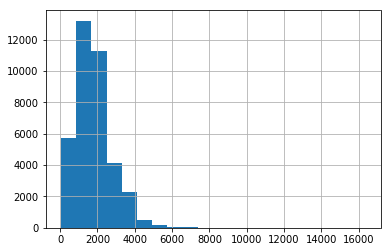

In [94]:
census['instance weight'].hist(bins=20)

# migration columns

In [95]:
census['migration code-change in msa'].value_counts()

?                   19104
Nonmover            15478
MSA to MSA           1886
NonMSA to nonMSA      439
MSA to nonMSA         114
NonMSA to MSA          96
Abroad to MSA          65
Not identifiable       64
Abroad to nonMSA        8
Name: migration code-change in msa, dtype: int64

In [96]:
census['migration code-change in reg'].value_counts()

?                                 19104
Nonmover                          15478
Same county                        1657
Different county same state         500
Different region                    225
Different state same division       151
Abroad                               73
Different division same region       66
Name: migration code-change in reg, dtype: int64

In [100]:
census['migration code-move within reg'].value_counts()

?                               19104
Nonmover                        15478
Same county                      1657
Different county same state       500
Different state in South          171
Different state in West            96
Different state in Midwest         93
Different state in Northeast       82
Abroad                             73
Name: migration code-move within reg, dtype: int64

In [98]:
census['migration prev res in sunbelt'].value_counts()

?      19104
No      1752
Yes      920
Name: migration prev res in sunbelt, dtype: int64

# live in this house 1 year ago

In [101]:
census['live in this house 1 year ago'].value_counts()

Under 1 year    19232
Yes             15478
No               2672
Name: live in this house 1 year ago, dtype: int64

# num persons worked for employer


In [102]:
census['num persons worked for employer'].value_counts()

6    11763
0     8397
1     5139
4     4159
3     3557
2     2594
5     1773
Name: num persons worked for employer, dtype: int64

In [103]:
temp_small_set = small_set.copy()
num_persons = []
for item in temp_small_set['num persons worked for employer'].tolist():
    class_ = int(item)
    if class_ == 6 or class_ == 5:
        num_persons.append("5+")
    elif class_ == 0 or class_ == 1:
        num_persons.append("0-1")
    else:
        num_persons.append("2-4")
print(pd.Series(num_persons).value_counts())
temp_small_set['num persons worked for employer'] = num_persons

0-1    145
5+     134
2-4     95
dtype: int64


# family members info

In [104]:
census['family members under 18'].value_counts()

Both parents present      3387
Mother only present       1093
Father only present        164
Neither parent present     140
Name: family members under 18, dtype: int64

In [105]:
census['country of birth father'].value_counts()

United-States                   30825
Mexico                           1276
?                                1245
Italy                             360
Puerto-Rico                       339
Canada                            282
Poland                            256
Germany                           255
Philippines                       244
Cuba                              185
China                             178
England                           166
Dominican-Republic                146
India                             140
Ireland                           132
El-Salvador                       121
Jamaica                            92
Columbia                           80
Greece                             76
South Korea                        72
Japan                              71
Portugal                           65
Haiti                              63
Ecuador                            63
Vietnam                            60
Hungary                            60
Iran        

In [106]:
census['country of birth mother'].value_counts()

United-States                   31008
Mexico                           1256
?                                1108
Puerto-Rico                       316
Canada                            288
Germany                           287
Italy                             282
Philippines                       255
Poland                            232
England                           221
Cuba                              179
Ireland                           156
China                             156
India                             144
El-Salvador                       134
Dominican-Republic                127
Japan                              91
Jamaica                            90
South Korea                        87
Columbia                           74
Vietnam                            64
Ecuador                            62
Hungary                            62
Haiti                              61
Portugal                           57
Scotland                           55
Iran        

In [107]:
census['country of birth self'].value_counts()

United-States                   33437
Mexico                            790
?                                 680
Philippines                       217
Puerto-Rico                       176
Germany                           169
Cuba                              151
Canada                            128
India                             121
England                           119
El-Salvador                        95
China                              92
Poland                             89
Dominican-Republic                 88
Italy                              80
Jamaica                            80
South Korea                        64
Japan                              63
Vietnam                            60
Columbia                           54
Haiti                              50
Iran                               49
Ecuador                            48
Taiwan                             47
Peru                               40
Ireland                            38
Greece      

In [108]:
temp_small_set = small_set.copy()
parents_and_self_birth = []
father_birth = temp_small_set['country of birth father'].tolist()
mother_birth = temp_small_set['country of birth mother'].tolist()
self_birth = temp_small_set['country of birth self'].tolist()
for i in range(len(temp_small_set)):
    father = str(father_birth[i]).lower()
    mother = str(mother_birth[i]).lower()
    self_ = str(self_birth[i]).lower()
    if self_ == 'united-states':
        if father == mother and self_ == father:
            parents_and_self_birth.append("All US")
        else:
            parents_and_self_birth.append("Self US, Parents Other")
    else:
        parents_and_self_birth.append("Self Other")
temp_small_set['country of parent and self births'] = parents_and_self_birth
temp_small_set['country of parent and self births'].value_counts()
        
    
    

All US                    299
Self Other                 46
Self US, Parents Other     29
Name: country of parent and self births, dtype: int64

In [109]:
census['citizenship'].value_counts()

Native- Born in the United States              33437
Foreign born- Not a citizen of U S              2100
Foreign born- U S citizen by naturalization     1315
Native- Born abroad of American Parent(s)        334
Native- Born in Puerto Rico or U S Outlying      196
Name: citizenship, dtype: int64

# own business or self employed

In [110]:
census['own business or self employed'].value_counts()

0    32150
2     4263
1      969
Name: own business or self employed, dtype: int64

# veterans columns

In [111]:
census['fill inc questionnaire for veterans admin'].value_counts()

No     385
Yes     59
Name: fill inc questionnaire for veterans admin, dtype: int64

In [113]:
census['veterans benefits'].value_counts()

2    33201
0     3737
1      444
Name: veterans benefits, dtype: int64

# weeks worked in a year

In [115]:
census['weeks worked in year'].value_counts()

52    21909
0      8397
40      689
50      664
48      474
26      465
30      289
12      288
36      276
51      250
20      249
16      199
44      193
46      187
8       180
32      179
45      170
49      165
35      146
42      140
39      136
24      134
4       123
28      120
10       99
38       96
13       80
43       79
25       77
6        69
15       68
22       67
2        66
47       64
1        62
3        56
18       54
17       52
5        46
34       44
14       42
9        42
7        30
37       29
21       29
41       20
29       16
27       15
11       15
19       14
33       13
31        9
23        7
Name: weeks worked in year, dtype: int64